(1, 0, 'doraemon', 282, 50, 608)
(1, 0, 'akinator', 282, 75, 608)
(2, 0, 'akinator', 323, 25, 636)
(1, 1, 'doraemon', 318, 50, 625)
(1, 1, 'akinator', 318, 75, 625)
(2, 1, 'akinator', 369, 25, 554)
(1, 2, 'doraemon', 321, 50, 618)
(1, 2, 'akinator', 321, 75, 618)
(2, 2, 'akinator', 284, 25, 633)
(1, 3, 'doraemon', 319, 50, 544)
(1, 3, 'akinator', 319, 75, 544)
(2, 3, 'akinator', 359, 25, 724)
(1, 4, 'doraemon', 280, 50, 704)
(1, 4, 'akinator', 280, 75, 704)
(2, 4, 'akinator', 333, 25, 626)
(1, 5, 'doraemon', 276, 50, 710)
(1, 5, 'akinator', 276, 75, 710)
(2, 5, 'akinator', 303, 25, 572)
(1, 6, 'doraemon', 334, 50, 641)
(1, 6, 'akinator', 334, 75, 641)
(2, 6, 'akinator', 342, 25, 667)
(1, 7, 'doraemon', 276, 50, 615)
(1, 7, 'akinator', 276, 75, 615)
(2, 7, 'akinator', 333, 25, 755)
(1, 8, 'doraemon', 274, 50, 533)
(1, 8, 'akinator', 274, 75, 533)
(2, 8, 'akinator', 308, 25, 611)
(1, 9, 'doraemon', 262, 50, 569)
(1, 9, 'akinator', 262, 75, 569)
(2, 9, 'akinator', 372, 25, 563)
(1, 10, 'd

[[ -7.9677604   10.45992407]
 [ -6.87565728   9.6208984 ]
 [-10.13344424  12.0786614 ]
 [ -6.55404398   8.56937147]
 [ -5.7740878   10.21302476]
 [ -6.07878608  11.17561336]
 [ -7.00855224  10.40602278]
 [ -5.83097045  11.08181593]
 [ -9.03005566   8.25148495]
 [ -6.42903645   8.23942281]
 [ -8.8034115   10.61982492]
 [ -8.18178327   9.9425639 ]
 [ -7.01487759   9.98640954]
 [ -8.78786359   9.73386924]
 [ -7.61315449   9.03056571]
 [ -6.6632396   11.74343054]
 [ -9.69421255   9.26268022]
 [ -6.84125066   8.11175693]
 [ -7.28966601  10.94282796]
 [ -9.82100751   9.93480773]
 [ -8.82007969   9.33668065]
 [ -6.67428276   9.47197931]
 [ -8.29367587  10.44431408]
 [ -8.23551145   9.60331927]
 [ -7.01887694   7.18046853]
 [ -7.34642607   8.98085246]
 [ -6.02929806  10.07163743]
 [ -7.84683293   7.68503177]
 [ -6.50098987  11.50621887]
 [ -8.48070049   9.69054424]
 [ -5.66966193   9.81650947]
 [ -7.38417583  10.17664065]
 [ -4.85337375  10.79947236]
 [ -7.89551703  10.27369072]
 [ -7.57719736

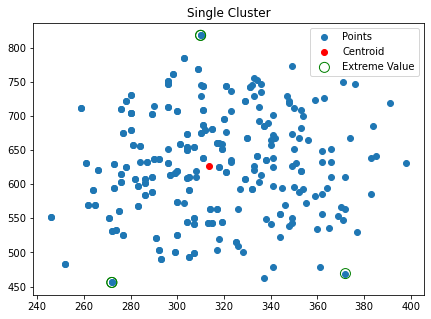

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import sqlite3
import random

dbname = 'cit-7.db'
# 1.データベースに接続
conn = sqlite3.connect(dbname)

# 2.sqliteを操作するカーソルオブジェクトを作成
cur = conn.cursor()

HPList = []
EXPList = []

cur.execute("select * from character;")
for row in cur.fetchall():
	print(row)
	HPList.append(row[3])
	EXPList.append(row[5])

print(HPList)

import matplotlib.pyplot as plt
#plt.scatter(HPList,EXPList)
#plt.title('Character status')
#plt.xlabel('HP')
#plt.ylabel('EXP')
#plt.show()

from sklearn.datasets import make_blobs
X, labels = make_blobs(100, centers=1)
import numpy as np

print(X)


#b = [[]]
a = []
#b = np.ones((100,2),int)
#print(b)

counter = 0

c = np.zeros((1,2))
#print(c)
for i in HPList:
	a = []
	a.append(i)
	a.append(EXPList[counter])
	#c.append(np.array(a))
	#print(np.array(a))
	#c= np.append(c, np.array(a))
	c = np.vstack((c, np.array(a)))
	#b.append(np.array(a))
	
	counter = counter + 1
	
c = np.delete(c,0,0)
print(c)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=1)
kmeans.fit(c)

#import matplotlib.pyplot as plt

#f, ax = plt.subplots(figsize=(8, 5))
#ax.set_title("Blob")
#ax.scatter(c[:, 0], c[:, 1], label='Points')
#ax.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], label='Centroid',color='r')
#ax.legend()
#plt.show()

distances = kmeans.transform(c)
sorted_idx = np.argsort(distances.ravel())[::-1][:5] 

f, ax = plt.subplots(figsize=(7, 5))
ax.set_title("Single Cluster")
ax.scatter(c[:, 0], c[:, 1], label='Points')
ax.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],label='Centroid', color='r')
ax.scatter(c[sorted_idx][:, 0], c[sorted_idx][:, 1],label='Extreme Value', edgecolors='g',facecolors='none', s=100)
ax.legend(loc='best')

plt.show()

cur.close()
conn.close()